# Importing Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas                        as pd
import numpy                         as np
import matplotlib.pyplot             as plt
%matplotlib inline
import seaborn                       as sns
from pandas.api.types                import is_numeric_dtype
#pandas setting
pd.set_option('display.max_columns', 500)

from sklearn.preprocessing           import normalize
from sklearn.model_selection         import train_test_split,GridSearchCV
from sklearn.metrics                 import *

# ML Libraries
from sklearn.linear_model            import LogisticRegression
from sklearn.tree                    import DecisionTreeClassifier
from sklearn.neighbors               import KNeighborsClassifier
from sklearn.discriminant_analysis   import LinearDiscriminantAnalysis
from sklearn.naive_bayes             import GaussianNB
from sklearn.ensemble                import RandomForestClassifier
from sklearn.decomposition           import PCA
#from xgboost                        import XGBClassifier


from imblearn.over_sampling          import *
from imblearn.combine                import *
from collections                     import Counter



# Reading the files

In [5]:
#Reading the data
url = "credit.csv"
df = pd.read_csv(url)
#df.shape
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [13]:
#binary conversion
df.replace(to_replace="yes", value = 1, inplace= True)
df.replace(to_replace="no", value = 0, inplace= True)
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,1,0
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,0,1
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,0,0
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,0,0
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,0,1


# EDA

In [14]:
numericalDf=df.select_dtypes(include=np.number)
numericalDf.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,default
0,6,1169,4,4,67,2,1,1,0
1,48,5951,2,2,22,1,1,0,1
2,12,2096,2,3,49,1,2,0,0
3,42,7882,2,4,45,1,2,0,0
4,24,4870,3,4,53,2,2,0,1


months_loan_duration 18.0
amount 2319.5
percent_of_income 3.0
years_at_residence 3.0
age 33.0
existing_loans_count 1.0
dependents 1.0
phone 0.0
default 0.0


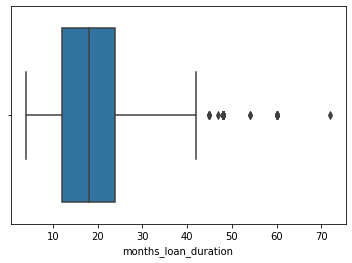

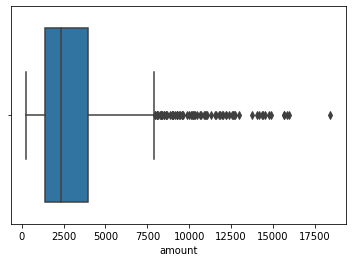

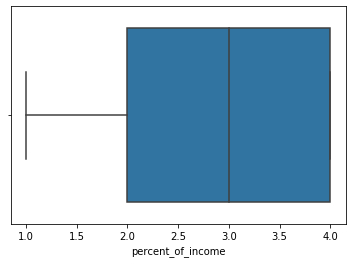

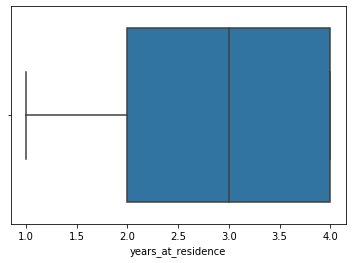

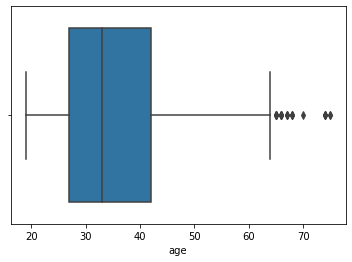

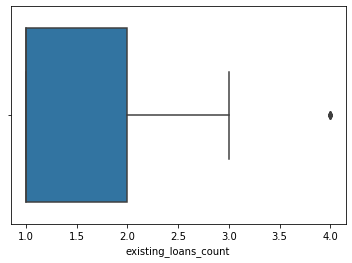

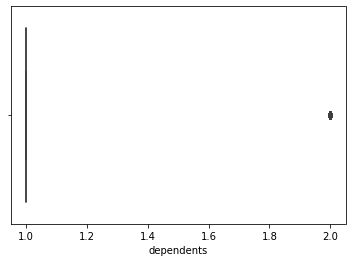

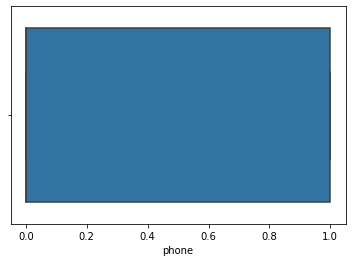

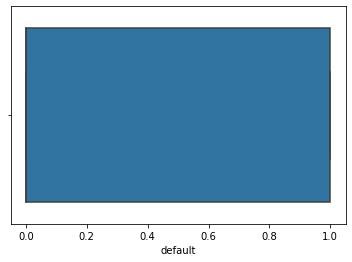

In [15]:
#Box plot to analyze if there is any outlliers for the numerical data set
for i,col in enumerate(numericalDf):
    plt.figure(i)
    sns.boxplot(x=numericalDf[col])
    print (col,numericalDf[col].median())

Although there are outliers it is very less to make an impact and hence we wont make any oulier processing

In [7]:
categoricalDf= df.select_dtypes(include=['object'])
categoricalDf.head()

,checking_balance,credit_history,purpose,savings_balance,employment_duration,other_credit,housing,job,phone,default
0,< 0 DM,critical,furniture/appliances,unknown,> 7 years,none,own,skilled,yes,no
1,1 - 200 DM,good,furniture/appliances,< 100 DM,1 - 4 years,none,own,skilled,no,yes
2,unknown,critical,education,< 100 DM,4 - 7 years,none,own,unskilled,no,no
3,< 0 DM,good,furniture/appliances,< 100 DM,4 - 7 years,none,other,skilled,no,no
4,< 0 DM,poor,car,< 100 DM,1 - 4 years,none,other,skilled,no,yes


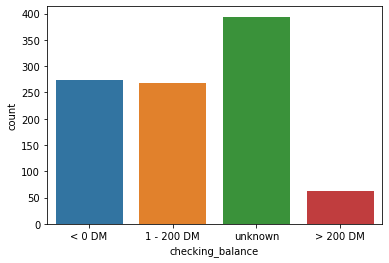

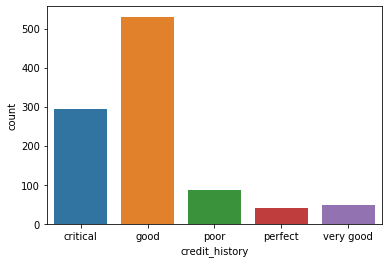

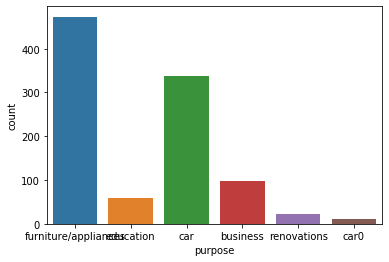

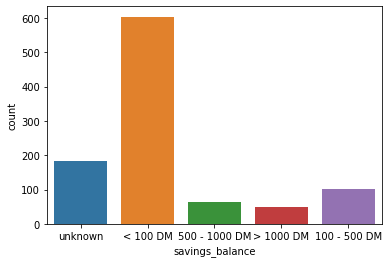

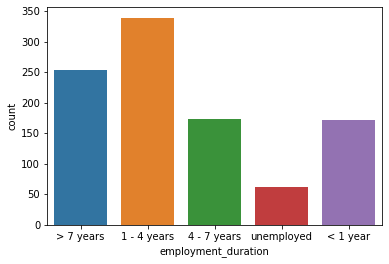

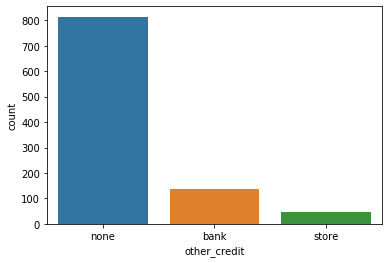

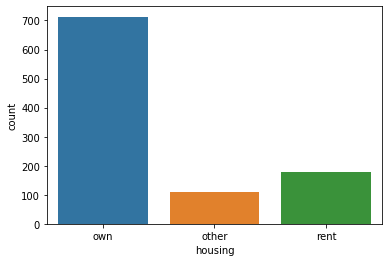

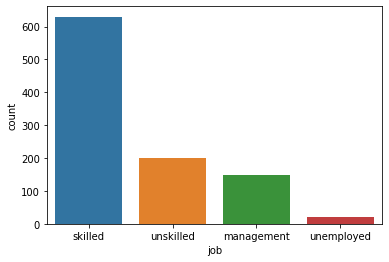

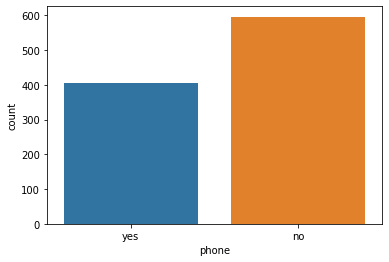

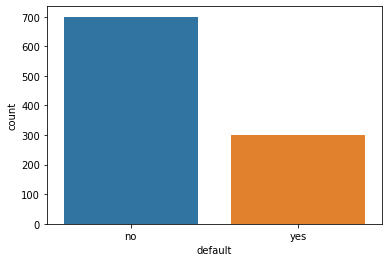

In [9]:
#Box plot to analyze distribution of data in categorical
for i,col in enumerate(categoricalDf):
    plt.figure(i)
    sns.countplot(x=categoricalDf[col])

There is a lot of missing values which we will deal with it later

Correlations

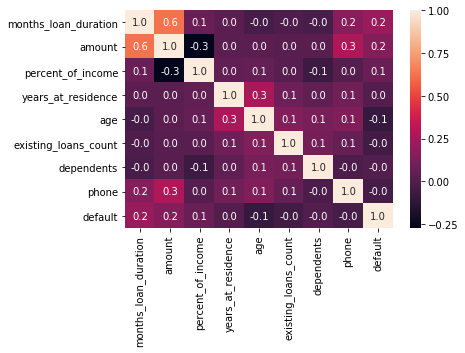

In [16]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")
plt.show()

None of the categorical columns are correlated to each other so we can eliminate the possibility of Multilinearcolinearilty

# Missing Value Imputation

In [28]:
#replace unknowns with nan
dfn= df.replace(to_replace="unknown", value = np.nan)
dfn.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,NaN,> 7 years,4,4,67,none,own,2,skilled,1,1,0
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,0,1
2,NaN,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,0,0
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,0,0
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,0,1


In [29]:
#getting the list of columns with nan
ml= dfn.columns[dfn.isna().any()].tolist()
ml

['checking_balance', 'savings_balance']

In [30]:
#filling the nans with the ratio
dfm=dfn
#drc = pd.DataFrame(columns = ml)
for item in  ml:
    #getting the ratio of the index labels
    val =pd.DataFrame(dfn[item].value_counts(normalize=True))
    print ("The probability ratio before filling the missing vlaues in %s is" % item )
    print (dfn[item].value_counts(normalize=True))
    #index labels in a list
    valr = val.index.tolist()
    #drc.index = valr
    #columns values in a list
    valc =val[item].tolist()
    #replacing the nan values with ratio
    dfm[item] = dfm[item].fillna(pd.Series(np.random.choice(valr,p=valc, size=len(dfm))))
    #sanity check
    print ("The probability ratio after filling the missing vlaues in %s is" % item )
    print ((dfm[item].value_counts(normalize=True)))



The probability ratio before filling the missing vlaues in checking_balance is
< 0 DM        0.452145
1 - 200 DM    0.443894
> 200 DM      0.103960
Name: checking_balance, dtype: float64
The probability ratio after filling the missing vlaues in checking_balance is
< 0 DM        0.449
1 - 200 DM    0.446
> 200 DM      0.105
Name: checking_balance, dtype: float64
The probability ratio before filling the missing vlaues in savings_balance is
< 100 DM         0.738066
100 - 500 DM     0.126071
500 - 1000 DM    0.077111
> 1000 DM        0.058752
Name: savings_balance, dtype: float64
The probability ratio after filling the missing vlaues in savings_balance is
< 100 DM         0.723
100 - 500 DM     0.143
500 - 1000 DM    0.075
> 1000 DM        0.059
Name: savings_balance, dtype: float64


In [31]:
dfm.head() #sanity check

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,< 100 DM,> 7 years,4,4,67,none,own,2,skilled,1,1,0
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,0,1
2,1 - 200 DM,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,0,0
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,0,0
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,0,1


In [32]:
#dependent variable
dfy=dfm.iloc[:,-1]
#independent variable
dfx=dfm.iloc[:,:-1]


In [33]:
#converting categorical data to numerical
dfxmc=pd.get_dummies(dfx)
dfxmc.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
0,6,1169,4,4,67,2,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,48,5951,2,2,22,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,12,2096,2,3,49,1,2,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
3,42,7882,2,4,45,1,2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
4,24,4870,3,4,53,2,2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [34]:
#normalizing
dfxmcn = (dfxmc-dfxmc.min())/(dfxmc.max()-dfxmc.min())
dfxmcn.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
#to avoid xgboost feature names error
dfxmcn.columns = [w.replace('<', 'less than').replace('>', 'greater than') for w in dfxmcn.columns.values]
dfxmcn.columns.values

array(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'phone', 'checking_balance_1 - 200 DM',
       'checking_balance_less than 0 DM',
       'checking_balance_greater than 200 DM', 'credit_history_critical',
       'credit_history_good', 'credit_history_perfect',
       'credit_history_poor', 'credit_history_very good',
       'purpose_business', 'purpose_car', 'purpose_car0',
       'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'savings_balance_100 - 500 DM',
       'savings_balance_500 - 1000 DM',
       'savings_balance_less than 100 DM',
       'savings_balance_greater than 1000 DM',
       'employment_duration_1 - 4 years',
       'employment_duration_4 - 7 years',
       'employment_duration_less than 1 year',
       'employment_duration_greater than 7 years',
       'employment_duration_unemployed', 'other_credit_bank',
       'other_credit_none', 'othe

In [36]:
dxdy = pd.concat([dfxmcn,dfy],axis=1)
dxdy.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,checking_balance_1 - 200 DM,checking_balance_less than 0 DM,checking_balance_greater than 200 DM,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_less than 100 DM,savings_balance_greater than 1000 DM,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_less than 1 year,employment_duration_greater than 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,default
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1


# User defined Functions

In [18]:
#defining a function for adjusted r square
def adjustedR(Ytest,ypredict,n,p):
    r2 = r2_score(Ytest,ypredict)
    adjustedr2 = 1-((1-r2)*((n-1)/(n-p-1)))
    #where n is number of observations in sample and p is number of independent variables in model
    return adjustedr2


In [19]:
#defing the ROC curve
def ROCcurve(fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    return (plt.show())

# Training

In [20]:
#defing the training and validation datasets
X_train, X_test, Y_train, Y_test = train_test_split(dfxmcn, dfy, test_size=0.20, random_state=7,shuffle=True)

In [21]:
#listing out the different ML Algorithms
models = []
models.append(('Logistic Regression with l1 penalty', LogisticRegression(penalty='l1',random_state= 7)))
models.append(('Logistic Regression with l2 penalty', LogisticRegression(penalty='l2',random_state= 7,dual=False)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
models.append(('Random Forest with Entropy', RandomForestClassifier(n_estimators=500, criterion= "entropy", random_state= 7)))
models.append(('Random Forest with gini', RandomForestClassifier(n_estimators=500, criterion= "gini", random_state= 7)))
models.append(('DecisionTree with entropy', DecisionTreeClassifier(criterion= "entropy", random_state= 7)))
models.append(('DecisionTree with gini', DecisionTreeClassifier(criterion= "gini", random_state= 7)))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('XGBoost', XGBClassifier(seed=7,learning_rate=0.01,max_depth=500)))


# Evaluation

In [22]:
#function to run the models for the datasets
def allmodels():
    model_list = pd.DataFrame(columns=("Model","Accuracy","F1Score","AUC","Diff of Adj R and R"))
    rownumber = 0
    for name, model in models:
        classifier = model
        classifier.fit(X_train, Y_train)
        # prediction
        Y_predict = classifier.predict(X_test)
        fpr, tpr, thresholds = roc_curve(Y_test, Y_predict, pos_label=1)
        #print (name)
        #ROCcurve(fpr, tpr)
        r2 = abs(r2_score(Y_test,Y_predict))
        adjustedr = abs(adjustedR(Y_test,Y_predict,len(dfxmcn),len(dfxmcn.columns)))
        model_list.loc[rownumber,"Model"]= name
        model_list.loc[rownumber,"Accuracy"] = round(((accuracy_score(Y_test,Y_predict))*100))
        model_list.loc[rownumber,"F1Score"]= round((f1_score(Y_test,Y_predict)),2)
        model_list.loc[rownumber,"AUC"]= round((roc_auc_score(Y_test,Y_predict)),2)
        model_list.loc[rownumber,"Diff of Adj R and R"] = round ((adjustedr-r2),3)
        #print (confusion_matrix(Y_test,Y_predict))
        rownumber += 1
    return (model_list.sort_values(by="AUC",ascending=False))


In [23]:
print (allmodels())

                                 Model Accuracy F1Score   AUC  \
7                 Gaussian Naive Bayes       76    0.56   0.7   
9                              XGBoost       78    0.52  0.67   
8         Linear Discriminant Analysis       79    0.46  0.65   
3           Random Forest with Entropy       79    0.45  0.64   
4              Random Forest with gini       78    0.46  0.64   
0  Logistic Regression with l1 penalty       79    0.43  0.63   
1  Logistic Regression with l2 penalty       78    0.42  0.63   
5            DecisionTree with entropy       68    0.45  0.63   
6               DecisionTree with gini       64    0.42   0.6   
2                                  KNN       73    0.16  0.52   

  Diff of Adj R and R  
7               0.054  
9               0.051  
8               0.047  
3               0.047  
4               0.048  
0               0.047  
1                0.05  
5               0.071  
6                0.08  
2               0.061  


From the ROC curve we can elimninate KNN , as GNB it has a bad ROC graph.
"Random Forest with entropy" has the highest accuracy,auc, f1 score and lowest difference between adjusted r square and r square.

Auc is 69 which means it has not classified properly. So now lets check the sample distibution

# Class Balancing

In [24]:
print('Original dataset shape {}'.format(Counter(dxdy['default'])))

Original dataset shape Counter({0: 700, 1: 300})


So this is pretty imbalanced. To balance it we can use oversampling 

In [25]:
sm = RandomOverSampler(random_state=42)
dfx, dfy = sm.fit_sample(dxdy.iloc[:,:-1], dxdy['default'])
print('Resampled dataset shape {}'.format(Counter(dfy)))

Resampled dataset shape Counter({0: 700, 1: 700})


In [26]:
#convertin to dataframe
dfxmcn = pd.DataFrame(dfx,columns=dxdy.iloc[:,:-1].columns.values)
dfxmcn.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,checking_balance_1 - 200 DM,checking_balance_less than 0 DM,checking_balance_greater than 200 DM,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_less than 100 DM,savings_balance_greater than 1000 DM,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_less than 1 year,employment_duration_greater than 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
#defing the training and validation datasets
X_train, X_test, Y_train, Y_test = train_test_split(dfxmcn, dfy, test_size=0.20, random_state=7,shuffle=True)

In [28]:
allmodels()

,Model,Accuracy,F1Score,AUC,Diff of Adj R and R
3,Random Forest with Entropy,87,0.87,0.87,-0.016
4,Random Forest with gini,85,0.86,0.85,-0.018
5,DecisionTree with entropy,82,0.84,0.83,-0.021
6,DecisionTree with gini,83,0.83,0.83,-0.021
9,XGBoost,77,0.78,0.77,-0.028
1,Logistic Regression with l2 penalty,69,0.7,0.69,0.037
8,Linear Discriminant Analysis,69,0.69,0.69,0.038
0,Logistic Regression with l1 penalty,68,0.69,0.68,0.038
2,KNN,66,0.66,0.66,0.041
7,Gaussian Naive Bayes,65,0.64,0.65,0.042


The AUC and accuracy has increased drastically

Now lets see if there is any difference after we apply the PCA

First we will plot all the principal componets and see its decreasing variance

# Dimensionality Reduction

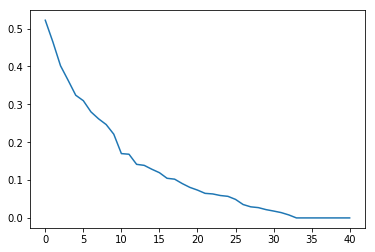

In [29]:
#PCA
X_train, X_test, Y_train, Y_test = train_test_split(dfxmcn, dfy, test_size=0.20, random_state=7,shuffle=True)
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
ev= pca.explained_variance_ratio_
#plt.plot(ev)
var_values = pca.explained_variance_
plt.plot(var_values)

Using the above elbow method for the above graph we can take 33 PCAs

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(dfxmcn, dfy, test_size=0.20, random_state=7,shuffle=True)
pca = PCA(n_components= 33)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [31]:
pcadf = allmodels()
print (pcadf)

                                 Model Accuracy F1Score   AUC  \
3           Random Forest with Entropy       89    0.89  0.89   
4              Random Forest with gini       88    0.88  0.88   
9                              XGBoost       85    0.85  0.85   
5            DecisionTree with entropy       81    0.83  0.81   
6               DecisionTree with gini       80    0.81   0.8   
0  Logistic Regression with l1 penalty       69    0.69  0.69   
1  Logistic Regression with l2 penalty       69     0.7  0.69   
8         Linear Discriminant Analysis       69    0.69  0.69   
7                 Gaussian Naive Bayes       67    0.65  0.67   
2                                  KNN       66    0.66  0.66   

  Diff of Adj R and R  
3              -0.014  
4              -0.015  
9              -0.018  
5              -0.023  
6              -0.024  
0               0.038  
1               0.037  
8               0.038  
7                0.04  
2               0.041  


Random Forest accuracy and auc has jumped to 90% and 0.90


# Hyper parameter Tuning

In [32]:
param_test1 = {
'bootstrap': [True, False],
#'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
#'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    }

In [33]:
param_test2 = {
'bootstrap': [True, False],
#'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2],
'min_samples_split': [2, 3,4,5],
#'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    }

In [34]:
model1= RandomForestClassifier(random_state=7,criterion= "entropy",n_estimators=500)
clf = GridSearchCV(model1, param_grid=param_test2, scoring='roc_auc')
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)


In [35]:
print(clf.best_score_)
print(clf.best_estimator_)


0.8993901909870143
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)


In [36]:
results = pd.DataFrame(clf.cv_results_)
results.sort_values(by="mean_test_score", ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,2.140636,0.052004,0.899390,1.0,True,1,2,"{'bootstrap': True, 'min_samples_leaf': 1, 'mi...",1,0.925746,1.0,0.896656,1.0,0.875697,1.0,0.043363,1.072147e-06,0.020528,6.409876e-17
1,2.207814,0.056009,0.898736,1.0,True,1,3,"{'bootstrap': True, 'min_samples_leaf': 1, 'mi...",2,0.923501,1.0,0.895909,1.0,0.876732,1.0,0.079291,5.653021e-03,0.019202,0.000000e+00
10,3.207911,0.054676,0.898643,1.0,False,1,4,"{'bootstrap': False, 'min_samples_leaf': 1, 'm...",3,0.925575,1.0,0.892502,1.0,0.877782,1.0,0.039685,1.890114e-03,0.019993,0.000000e+00
11,3.165841,0.053331,0.898473,1.0,False,1,5,"{'bootstrap': False, 'min_samples_leaf': 1, 'm...",4,0.923630,1.0,0.893264,1.0,0.878457,1.0,0.016384,1.876434e-03,0.018810,0.000000e+00
8,3.201970,0.054671,0.897979,1.0,False,1,2,"{'bootstrap': False, 'min_samples_leaf': 1, 'm...",5,0.924431,1.0,0.889584,1.0,0.879852,1.0,0.035857,1.885987e-03,0.019146,0.000000e+00
2,2.071256,0.050676,0.897538,1.0,True,1,4,"{'bootstrap': True, 'min_samples_leaf': 1, 'mi...",6,0.924760,1.0,0.894227,1.0,0.873555,1.0,0.033374,1.890218e-03,0.021039,0.000000e+00
3,2.093723,0.054015,0.897521,1.0,True,1,5,"{'bootstrap': True, 'min_samples_leaf': 1, 'mi...",7,0.922729,1.0,0.895348,1.0,0.874418,1.0,0.017475,1.633442e-03,0.019787,0.000000e+00
15,3.050445,0.054678,0.897472,1.0,False,2,5,"{'bootstrap': False, 'min_samples_leaf': 2, 'm...",8,0.924016,1.0,0.892013,1.0,0.876315,1.0,0.042654,1.878288e-03,0.019856,0.000000e+00
9,3.233466,0.054671,0.897363,1.0,False,1,3,"{'bootstrap': False, 'min_samples_leaf': 1, 'm...",9,0.922629,1.0,0.889914,1.0,0.879478,1.0,0.097396,1.885875e-03,0.018390,0.000000e+00
4,2.035560,0.053342,0.897327,1.0,True,2,2,"{'bootstrap': True, 'min_samples_leaf': 2, 'mi...",10,0.925132,1.0,0.894744,1.0,0.872032,1.0,0.040992,1.882296e-03,0.021760,0.000000e+00


In [37]:
param_test3 = {
#'bootstrap': [True],
#'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#'max_features': ['auto', 'sqrt'],
#'min_samples_leaf': [1, 2],
#'min_samples_split': [2, 3,4,5],
'n_estimators': [200, 400, 600, 500, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    }

In [38]:
model1= RandomForestClassifier(random_state=7,criterion= "entropy",bootstrap=True, min_samples_leaf= 1,min_samples_split =2)
clf = GridSearchCV(model1, param_grid=param_test3, scoring='roc_auc')
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)


In [40]:
results = pd.DataFrame(clf.cv_results_)
results.sort_values(by="mean_test_score", ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
5,4.278988,0.107047,0.900839,1.0,1000,{'n_estimators': 1000},1,0.927863,1.0,0.897979,1.0,0.876603,1.0,0.133111,0.004300,0.021029,6.409876e-17
6,5.178182,0.130670,0.900585,1.0,1200,{'n_estimators': 1200},2,0.928334,1.0,0.897677,1.0,0.875668,1.0,0.097150,0.006804,0.021604,6.409876e-17
4,3.529764,0.084697,0.900408,1.0,800,{'n_estimators': 800},3,0.927477,1.0,0.896671,1.0,0.877005,1.0,0.066425,0.000965,0.020778,0.000000e+00
7,5.987163,0.164011,0.900307,1.0,1400,{'n_estimators': 1400},4,0.928563,1.0,0.897821,1.0,0.874461,1.0,0.082452,0.025509,0.022162,0.000000e+00
8,6.811003,0.167722,0.900120,1.0,1600,{'n_estimators': 1600},5,0.928864,1.0,0.897778,1.0,0.873642,1.0,0.150959,0.002911,0.022610,0.000000e+00
9,7.695472,0.188381,0.899891,1.0,1800,{'n_estimators': 1800},6,0.928377,1.0,0.896714,1.0,0.874504,1.0,0.217826,0.000532,0.022113,0.000000e+00
10,8.421668,0.208220,0.899518,1.0,2000,{'n_estimators': 2000},7,0.927906,1.0,0.896110,1.0,0.874461,1.0,0.196214,0.000303,0.021956,0.000000e+00
3,2.165584,0.053687,0.899390,1.0,500,{'n_estimators': 500},8,0.925746,1.0,0.896656,1.0,0.875697,1.0,0.070662,0.001690,0.020528,6.409876e-17
2,2.614304,0.063998,0.899213,1.0,600,{'n_estimators': 600},9,0.925932,1.0,0.895204,1.0,0.876430,1.0,0.094092,0.003272,0.020411,0.000000e+00
1,1.711048,0.041521,0.898629,1.0,400,{'n_estimators': 400},10,0.925418,1.0,0.895219,1.0,0.875180,1.0,0.064555,0.001093,0.020655,0.000000e+00


# Final Model Selection

In [39]:
print(clf.best_score_)
print(clf.best_estimator_)


0.9008389156771774
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)


So this the best combination of hyperparameters for Random forest